In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Re-loading the file
file_path = 'contributions (1).csv'
data = pd.read_csv(file_path)

# Group the data by hierarchy only, selecting only numeric columns for the sum
numeric_data = data.select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby(data['hierarchy']).sum()

# Calculate the percentage impact for each key driver
grouped_data['total_impact'] = grouped_data.sum(axis=1)
percentage_impact = grouped_data.div(grouped_data['total_impact'], axis=0) * 100
percentage_impact = percentage_impact.drop(columns=['total_impact'])

# Function to plot the percentage impact for a given hierarchy
def plot_impact(hierarchy):
    plt.figure(figsize=(12, 8))
    selected_data = percentage_impact.loc[hierarchy]
    plt.bar(selected_data.index, selected_data.values)
    plt.title(f'Percentage Impact of Key Drivers for {hierarchy}')
    plt.xlabel('Key Drivers')
    plt.ylabel('Percentage Impact')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for hierarchy
hierarchies = data['hierarchy'].unique()
hierarchy_dropdown = widgets.Dropdown(options=hierarchies, description='Hierarchy:')

# Use interact to create the dropdown functionality
interact(plot_impact, hierarchy=hierarchy_dropdown)


interactive(children=(Dropdown(description='Hierarchy:', options=('brand0', 'brand1', 'brand10', 'brand11', 'b…

<function __main__.plot_impact(hierarchy)>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

# Re-loading the file
file_path = 'contributions (13) (1).csv'
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format (if you're using a full date column)
data['date'] = pd.to_datetime(data['date'])

# Filter the data to include only rows from the year 2023
data_2023 = data[data['date'].dt.year == 2023]

# If you have a year column instead, use this:
# data_2023 = data[data['year'] == 2023]

# Filter the data to include only columns that start with 'paid_'
paid_columns = [col for col in data_2023.columns if col.startswith('paid_')]

# Group the data by hierarchy only, selecting only the filtered columns for the sum
numeric_data = data_2023[paid_columns + ['hierarchy']].select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby(data_2023['hierarchy']).sum()

# Divide the values by 1e6 to convert them to millions
grouped_data = grouped_data / 1e6

# Function to plot the real impact of key drivers in a waterfall chart for a given hierarchy
def plot_waterfall(hierarchy):
    plt.figure(figsize=(14, 8))
    selected_data = grouped_data.loc[hierarchy]

    # Calculate the cumulative sum to simulate the waterfall effect
    cumulative_values = selected_data.cumsum().shift(fill_value=0)
    
    # Define the bar positions with gaps
    bar_positions = np.arange(len(selected_data)) * 2

    # Plot the waterfall bars
    bars = plt.bar(bar_positions, selected_data, bottom=cumulative_values, color="blue")

    # Add labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bar.get_y() + height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

    # Set the labels and title
    plt.title(f'Real Impact of Key Drivers for {hierarchy} (Waterfall Chart)')
    plt.xlabel('Key Drivers')
    plt.ylabel('Real Impact (in millions)')
    plt.xticks(ticks=bar_positions, labels=selected_data.index, rotation=90)
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for hierarchy
hierarchies = data_2023['hierarchy'].unique()
hierarchy_dropdown = widgets.Dropdown(options=hierarchies, description='Hierarchy:')

# Use interact to create the dropdown functionality
interact(plot_waterfall, hierarchy=hierarchy_dropdown)


FileNotFoundError: [Errno 2] No such file or directory: 'contributions (13) (1).csv'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Function to load and process data from a file
def load_and_process_data(file_path):
    # Load the file
    data = pd.read_csv(file_path)

    # Ensure the date column is in datetime format (if you're using a full date column)
    data['date'] = pd.to_datetime(data['date'])

    # Filter the data to include only rows from the year 2023
    data_2023 = data[data['date'].dt.year == 2023]

    # Filter the data to include only columns that start with 'paid_'
    paid_columns = [col for col in data_2023.columns if col.startswith('paid_')]

    # Group the data by hierarchy only, selecting only the filtered columns for the sum
    numeric_data = data_2023[paid_columns + ['hierarchy']].select_dtypes(include=[float, int])
    grouped_data = numeric_data.groupby(data_2023['hierarchy']).sum()

    # Divide the values by 1e6 to convert them to millions
    grouped_data = grouped_data / 1e6

    return grouped_data

# Updated Function to plot the real impact of key drivers in a waterfall chart for a given hierarchy
def plot_waterfall(grouped_data, hierarchy, title):
    plt.figure(figsize=(14, 8))
    
    # Select the data for the given hierarchy and sort it
    selected_data = grouped_data.loc[hierarchy].sort_index()

    # Calculate the cumulative sum to simulate the waterfall effect
    cumulative_values = selected_data.cumsum().shift(fill_value=0)
    
    # Define the bar positions with gaps
    bar_positions = np.arange(len(selected_data)) * 2

    # Plot the waterfall bars
    bars = plt.bar(bar_positions, selected_data, bottom=cumulative_values, color="blue")

    # Add labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bar.get_y() + height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

    # Set the labels and title
    plt.title(f'{title} for {hierarchy} (Waterfall Chart)')
    plt.xlabel('Key Drivers')
    plt.ylabel('Real Impact (in millions)')
    plt.xticks(ticks=bar_positions, labels=selected_data.index, rotation=90)
    plt.tight_layout()
    plt.show()

# Function to plot the difference between two datasets
def plot_difference(data1, data2, hierarchy):
    difference = data1.loc[hierarchy] - data2.loc[hierarchy]
    
    plt.figure(figsize=(14, 8))
    bar_positions = np.arange(len(difference)) * 2
    bars = plt.bar(bar_positions, difference, color="green")

    # Add labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bar.get_y() + height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

    # Set the labels and title
    plt.title(f'Difference in Real Impact for {hierarchy}')
    plt.xlabel('Key Drivers')
    plt.ylabel('Difference in Impact (in millions)')
    plt.xticks(ticks=bar_positions, labels=difference.index, rotation=90)
    plt.tight_layout()
    plt.show()

# File names (replace these with your actual file names)
file1 = 'contributions (10) (1).csv'
file2 = 'contributions (9) (1).csv'

# Load data from the specified files
data1 = load_and_process_data(file1)
data2 = load_and_process_data(file2)

# Dropdown for hierarchy
hierarchies = sorted(set(data1.index) & set(data2.index))
hierarchy_dropdown = widgets.Dropdown(options=hierarchies, description='Hierarchy:')

# Interactive plotting function
def interactive_plot(hierarchy):
    plot_waterfall(data1, hierarchy, 'File 1')
    plot_waterfall(data2, hierarchy, 'File 2')
    plot_difference(data1, data2, hierarchy)

# Use interact to create the dropdown functionality
interact(interactive_plot, hierarchy=hierarchy_dropdown)


interactive(children=(Dropdown(description='Hierarchy:', options=('brand0', 'brand1', 'brand10', 'brand11', 'b…

<function __main__.interactive_plot(hierarchy)>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

# Re-loading the file
file_path = 'contributions (9) (1).csv'
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format (if you're using a full date column)
data['date'] = pd.to_datetime(data['date'])

# Filter the data to include only rows from the year 2023
data_2023 = data[data['date'].dt.year == 2023]

# If you have a year column instead, use this:
# data_2023 = data[data['year'] == 2023]

# Filter the data to include only columns that start with 'paid_'
paid_columns = [col for col in data_2023.columns if col.startswith('paid_')]

# Group the data by hierarchy only, selecting only the filtered columns for the sum
numeric_data = data_2023[paid_columns + ['hierarchy']].select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby(data_2023['hierarchy']).sum()

# Divide the values by 1e6 to convert them to millions
grouped_data = grouped_data / 1e6

# Function to plot the real impact of key drivers in a waterfall chart for a given hierarchy
def plot_waterfall(hierarchy):
    plt.figure(figsize=(14, 8))
    selected_data = grouped_data.loc[hierarchy]

    # Calculate the cumulative sum to simulate the waterfall effect
    cumulative_values = selected_data.cumsum().shift(fill_value=0)
    
    # Define the bar positions with gaps
    bar_positions = np.arange(len(selected_data)) * 2

    # Plot the waterfall bars
    bars = plt.bar(bar_positions, selected_data, bottom=cumulative_values, color="blue")

    # Add labels on top of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bar.get_y() + height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

    # Set the labels and title
    plt.title(f'Real Impact of Key Drivers for {hierarchy} (Waterfall Chart)')
    plt.xlabel('Key Drivers')
    plt.ylabel('Real Impact (in millions)')
    plt.xticks(ticks=bar_positions, labels=selected_data.index, rotation=90)
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for hierarchy
hierarchies = data_2023['hierarchy'].unique()
hierarchy_dropdown = widgets.Dropdown(options=hierarchies, description='Hierarchy:')

# Use interact to create the dropdown functionality
interact(plot_waterfall, hierarchy=hierarchy_dropdown)


interactive(children=(Dropdown(description='Hierarchy:', options=('brand0', 'brand1', 'brand10', 'brand11', 'b…

<function __main__.plot_waterfall(hierarchy)>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Load the file
file_path = 'contributions (13) (1).csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime, considering day first in the format
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Group the data by customer, brand, and date
numeric_data = data.select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby([data['customer_name'], data['brand'], data['date']]).sum()

# Calculate the percentage impact for each key driver over time
grouped_data['total_impact'] = grouped_data.sum(axis=1)
percentage_impact = grouped_data.drop(columns=['total_impact'])

# Calculate year-on-year percentage change for each driver
percentage_change = percentage_impact.groupby([data['customer_name'], data['brand']]).pct_change(periods=12) * 100

# Function to plot the year-on-year percentage change for a given customer, brand, and driver over time
def plot_driver_impact(customer, brand, driver):
    plt.figure(figsize=(14, 8))
    selected_data = percentage_change.loc[(customer, brand), driver].dropna()
    
    # Plot using the mapped dates
    plt.plot(selected_data.index.get_level_values('date'), selected_data.values, marker='o', linestyle='-', color='blue')
    
    plt.title(f'YoY % Change of {driver} Over Time for {brand} (Customer: {customer})')
    plt.xlabel('Time')
    plt.ylabel('YoY % Change')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
    plt.tight_layout()
    plt.show()

# Create dropdown widgets for customer, brand, and driver
customers = data['customer_name'].unique()
brands = data['brand'].unique()
drivers = percentage_change.columns

customer_dropdown = widgets.Dropdown(options=customers, description='Customer:')
brand_dropdown = widgets.Dropdown(options=brands, description='Brand:')
driver_dropdown = widgets.Dropdown(options=drivers, description='Driver:')

# Use interact to create the dropdown functionality
interact(plot_driver_impact, customer=customer_dropdown, brand=brand_dropdown, driver=driver_dropdown)


/var/tmp/ipykernel_2062/851794534.py:12: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True)


KeyError: 'customer_name'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Load the file
file_path = 'contributions v5.csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime, considering day first in the format
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Group the data by customer, brand, and time (assuming 'date' or 'year' column exists)
# and then by key drivers (numeric columns)
time_column = 'date'  # or 'year', depending on your data
numeric_data = data.select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby([data['customer_name'], data['brand'], data[time_column]]).sum()

# Calculate the percentage impact for each key driver over time
grouped_data['total_impact'] = grouped_data.sum(axis=1)
percentage_impact = grouped_data.div(grouped_data['total_impact'], axis=0) * 100
percentage_impact = percentage_impact.drop(columns=['total_impact'])

# Function to plot the percentage impact for a given customer, brand, and two drivers over time
def plot_driver_impact(customer, brand, driver1, driver2):
    plt.figure(figsize=(14, 8))
    
    if driver1 in percentage_impact.columns:
        selected_data1 = percentage_impact.loc[(customer, brand), driver1]
        plt.plot(selected_data1.index, selected_data1.values, marker='o', linestyle='-', color='blue', label=driver1)
    
    if driver2 in percentage_impact.columns:
        selected_data2 = percentage_impact.loc[(customer, brand), driver2]
        plt.plot(selected_data2.index, selected_data2.values, marker='o', linestyle='-', color='orange', label=driver2)
    
    plt.title(f'Percentage Impact of {driver1} and {driver2} Over Time for {brand} (Customer: {customer})')
    plt.xlabel('Time')
    plt.ylabel('Percentage Impact')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create dropdown widgets for customer, brand, and drivers
customers = data['customer_name'].unique()
brands = data['brand'].unique()
drivers = percentage_impact.columns

customer_dropdown = widgets.Dropdown(options=customers, description='Customer:')
brand_dropdown = widgets.Dropdown(options=brands, description='Brand:')
driver1_dropdown = widgets.Dropdown(options=drivers, description='Driver 1:')
driver2_dropdown = widgets.Dropdown(options=drivers, description='Driver 2:')

# Use interact to create the dropdown functionality
interact(plot_driver_impact, customer=customer_dropdown, brand=brand_dropdown, driver1=driver1_dropdown, driver2=driver2_dropdown)


interactive(children=(Dropdown(description='Customer:', options=('customer0', 'customer1', 'customer10', 'cust…

<function __main__.plot_driver_impact(customer, brand, driver1, driver2)>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Load the file
file_path = 'contributions v4.csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime, considering day first in the format
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Group the data by customer, brand, and time (assuming 'date' or 'year' column exists)
# and then by key drivers (numeric columns)
time_column = 'date'  # or 'year', depending on your data
numeric_data = data.select_dtypes(include=[float, int])
grouped_data = numeric_data.groupby([data['customer_name'], data['brand'], data[time_column]]).sum()

# Calculate the percentage impact for each key driver over time
grouped_data['total_impact'] = grouped_data.sum(axis=1)
percentage_impact = grouped_data
# Keeping total_impact in grouped_data for plotting purposes
percentage_impact = percentage_impact.drop(columns=['total_impact'])

# Function to plot the percentage impact for a given customer, brand, and two drivers over time
def plot_driver_impact(customer, brand, driver1, driver2):
    plt.figure(figsize=(14, 8))
    
    # Plot total sales
    total_sales = grouped_data.loc[(customer, brand), 'total_impact']
    plt.plot(total_sales.index, total_sales.values, marker='o', linestyle='-', color='green', label='Total Sales')

    # Plot selected driver 1
    if driver1 in percentage_impact.columns:
        selected_data1 = percentage_impact.loc[(customer, brand), driver1]
        plt.plot(selected_data1.index, selected_data1.values, marker='o', linestyle='-', color='blue', label=driver1)
    
    # Plot selected driver 2
    if driver2 in percentage_impact.columns:
        selected_data2 = percentage_impact.loc[(customer, brand), driver2]
        plt.plot(selected_data2.index, selected_data2.values, marker='o', linestyle='-', color='orange', label=driver2)
    
    plt.title(f'Percentage Impact of {driver1} and {driver2} Over Time for {brand} (Customer: {customer})')
    plt.xlabel('Time')
    plt.ylabel('Percentage Impact / Total Sales')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
    plt.legend()
    plt.tight_layout()
    plt.show()

# Create dropdown widgets for customer, brand, and drivers
customers = data['customer_name'].unique()
brands = data['brand'].unique()
drivers = percentage_impact.columns

customer_dropdown = widgets.Dropdown(options=customers, description='Customer:')
brand_dropdown = widgets.Dropdown(options=brands, description='Brand:')
driver1_dropdown = widgets.Dropdown(options=drivers, description='Driver 1:')
driver2_dropdown = widgets.Dropdown(options=drivers, description='Driver 2:')

# Use interact to create the dropdown functionality
interact(plot_driver_impact, customer=customer_dropdown, brand=brand_dropdown, driver1=driver1_dropdown, driver2=driver2_dropdown)


interactive(children=(Dropdown(description='Customer:', options=('customer0', 'customer10', 'customer14', 'cus…

<function __main__.plot_driver_impact(customer, brand, driver1, driver2)>

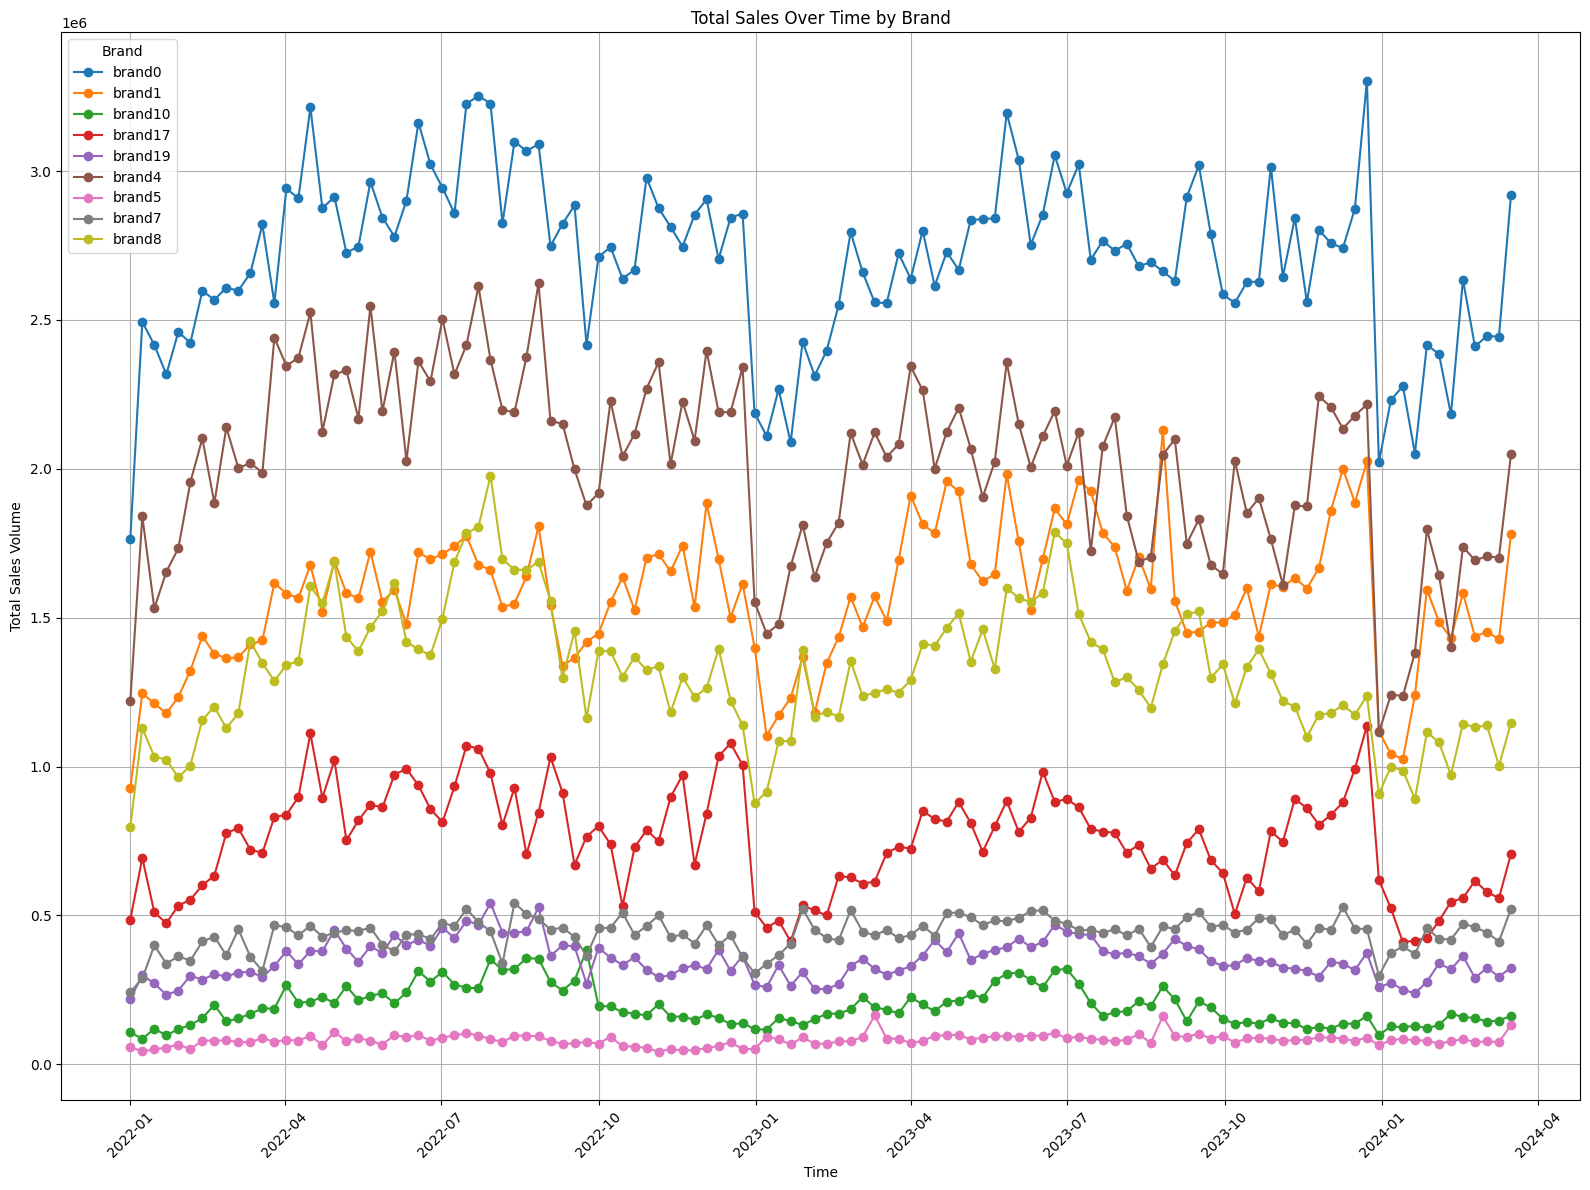

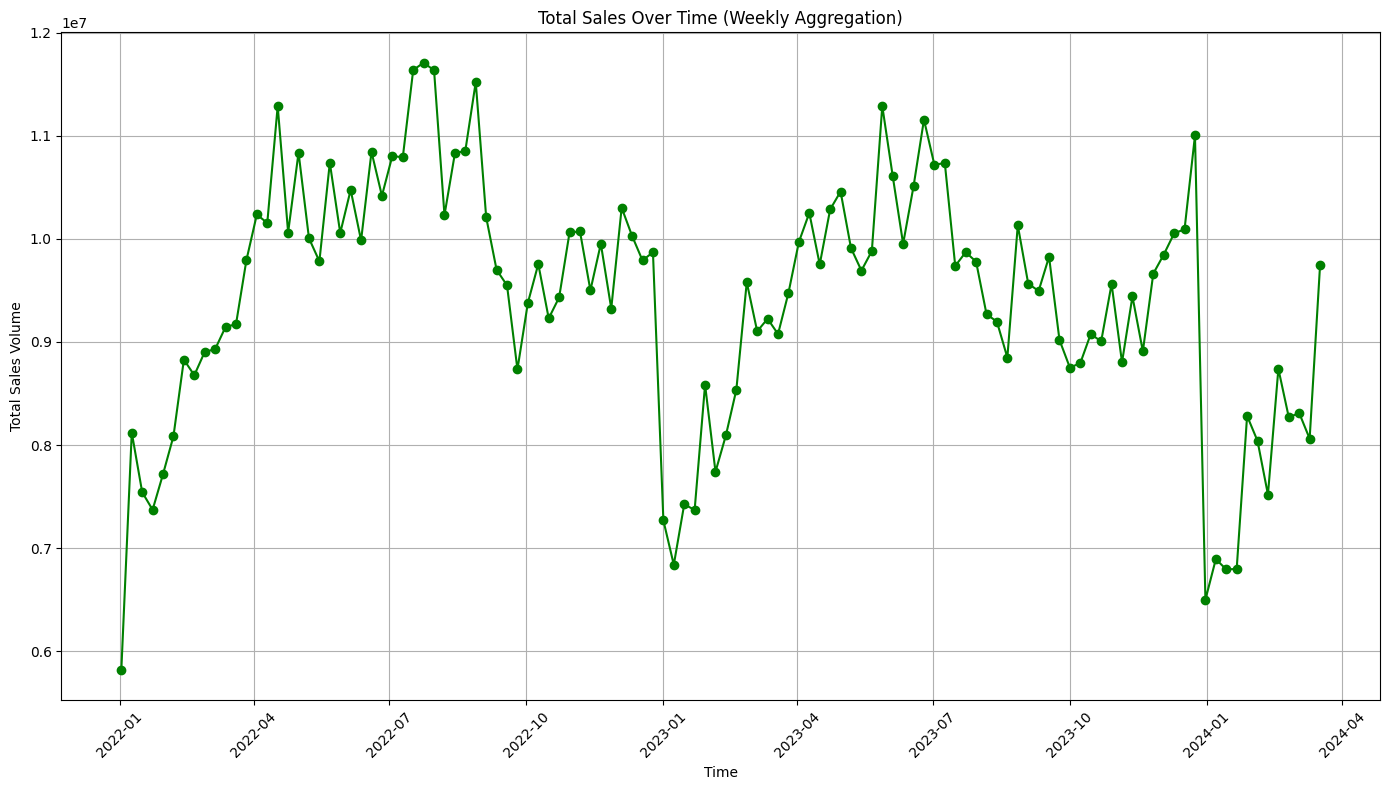

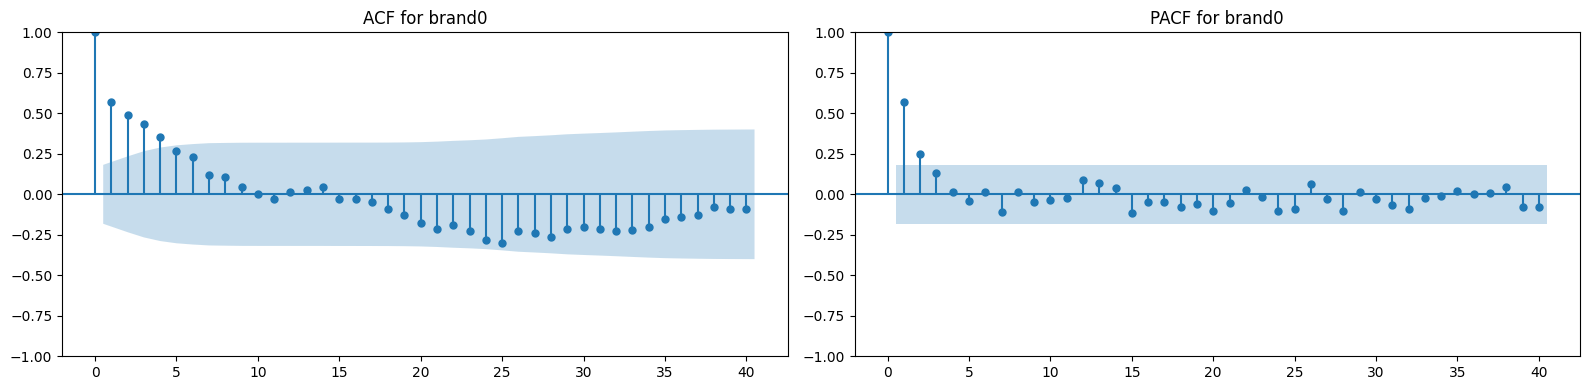

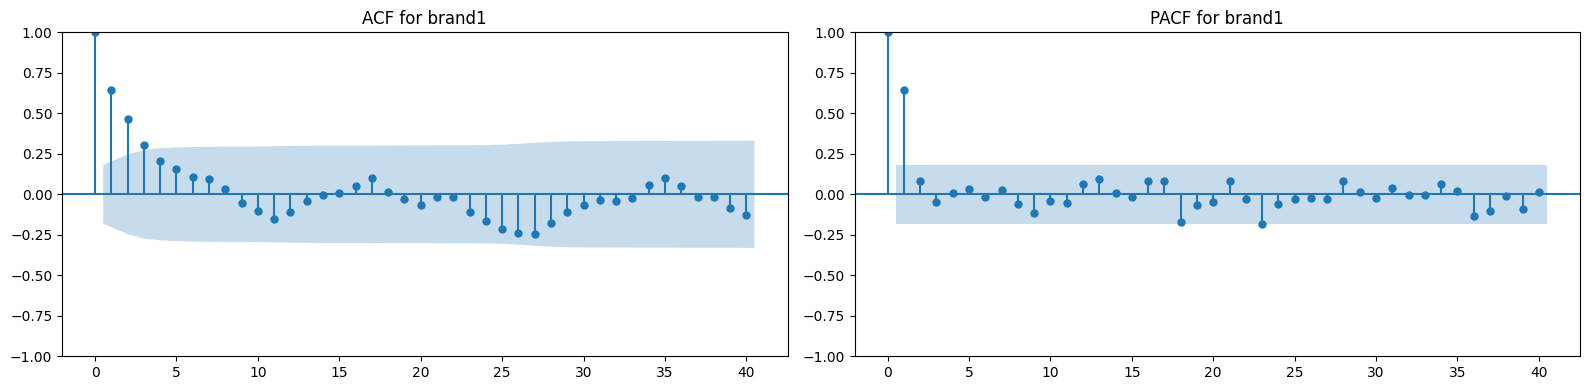

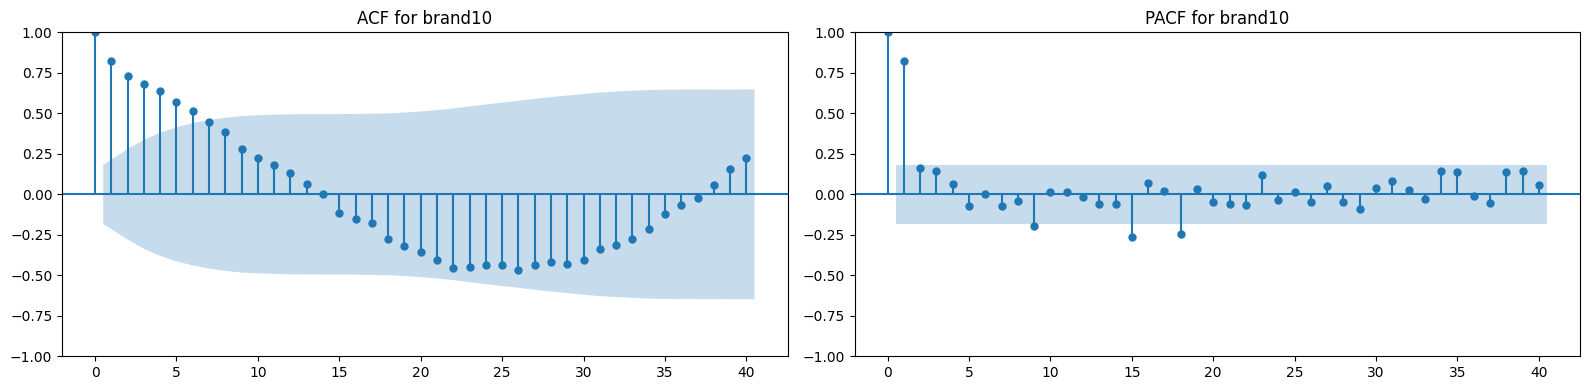

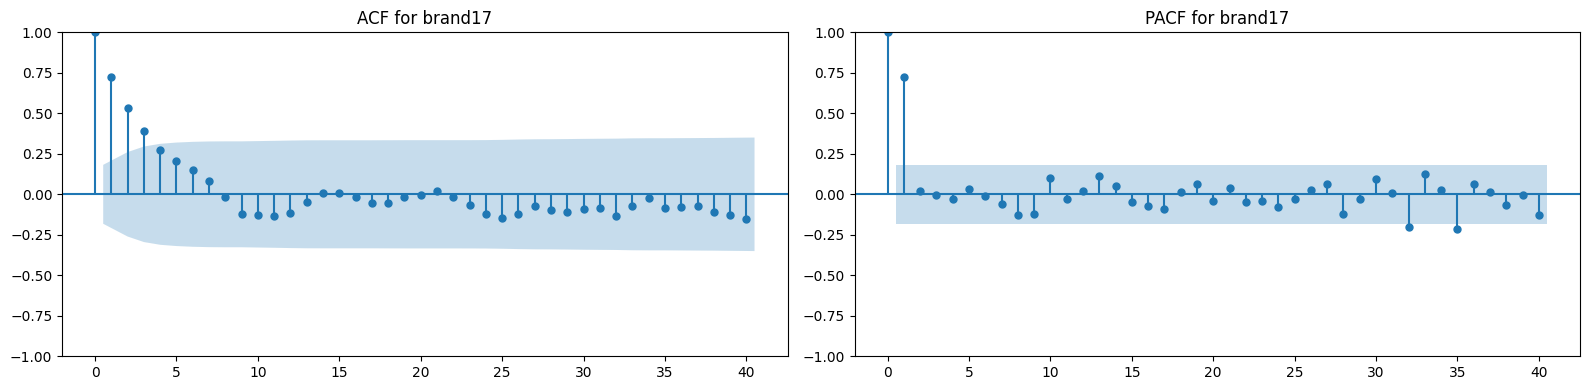

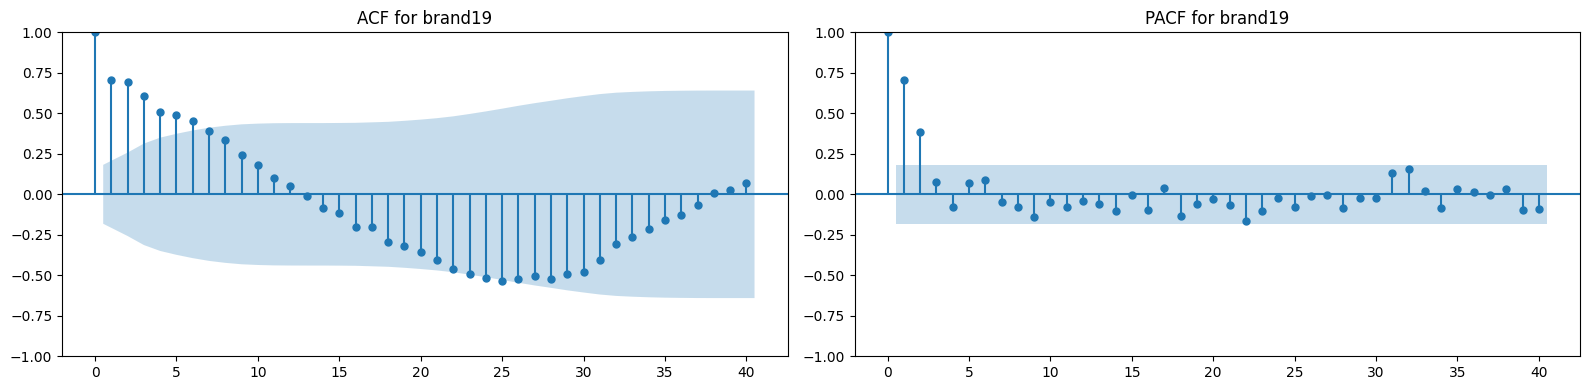

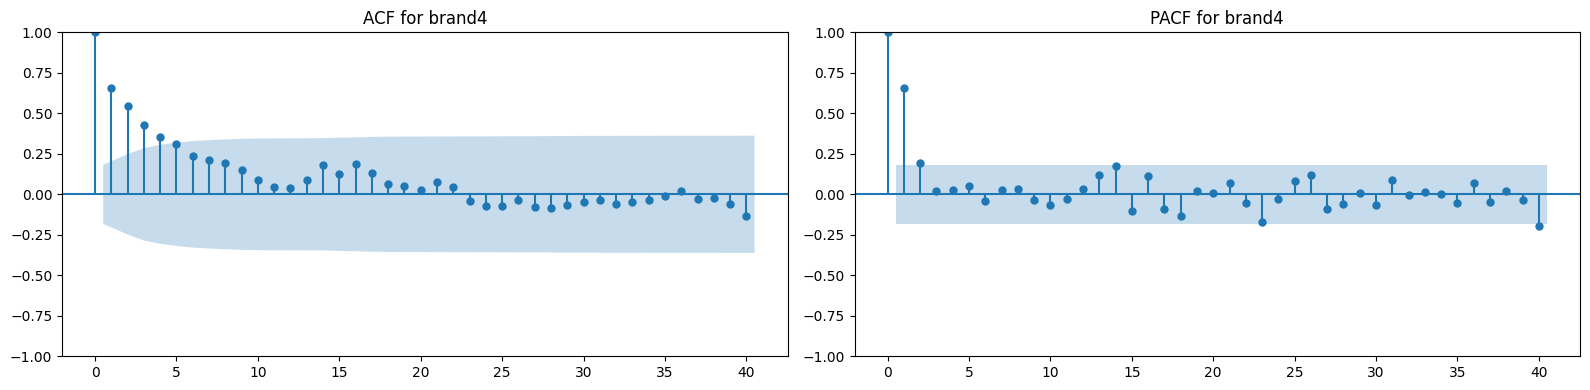

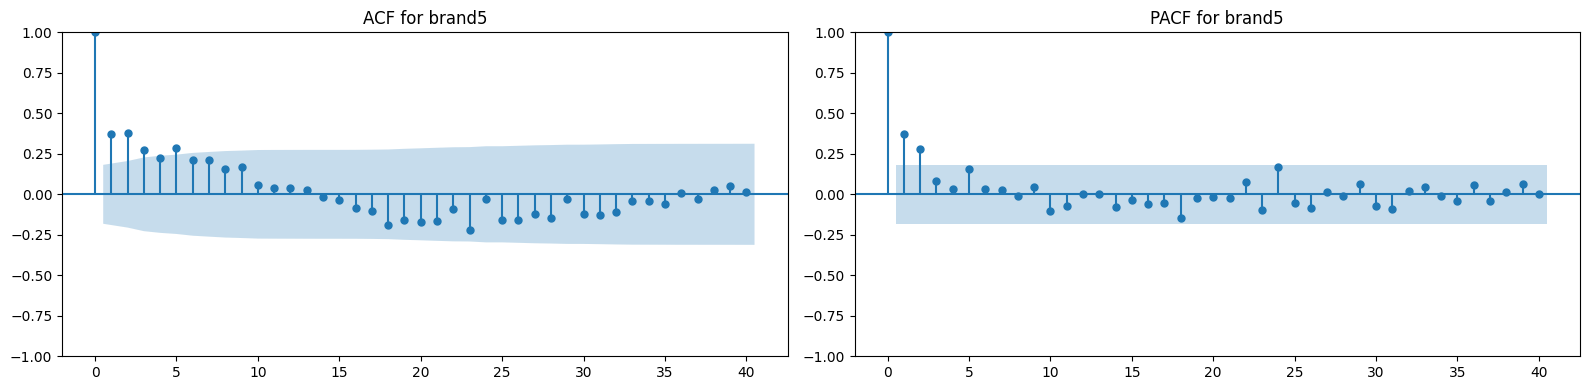

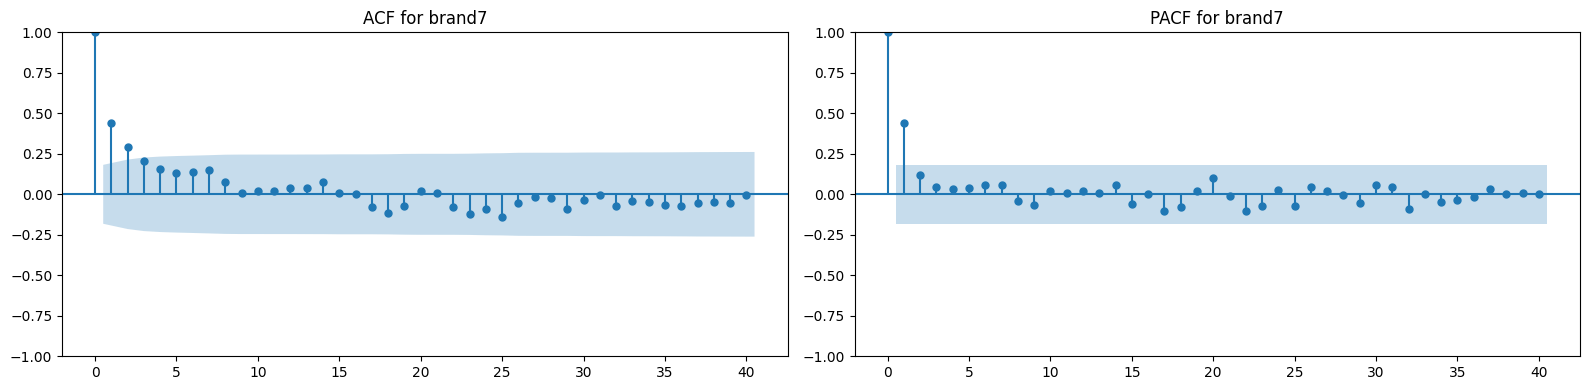

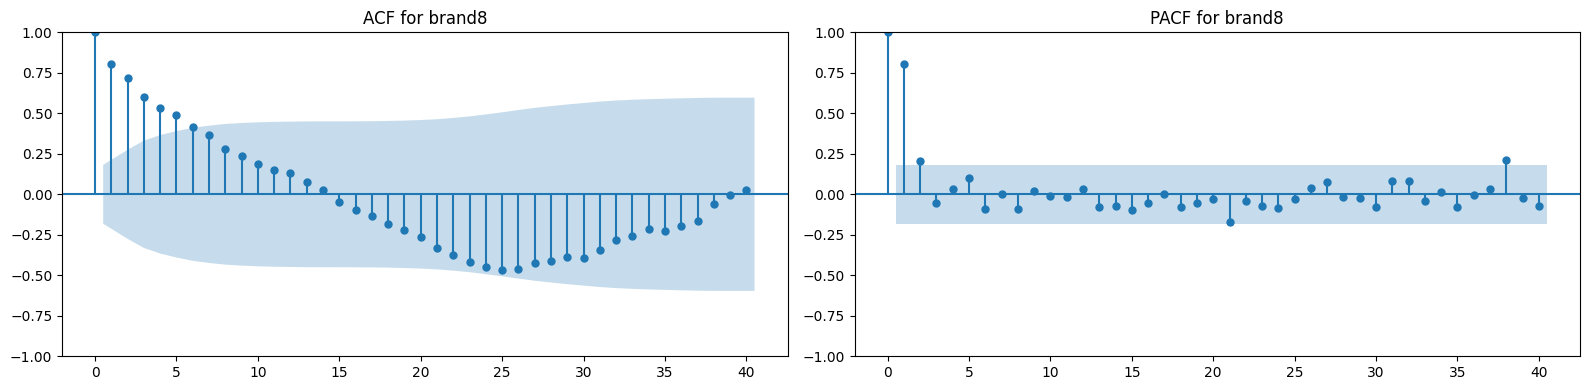

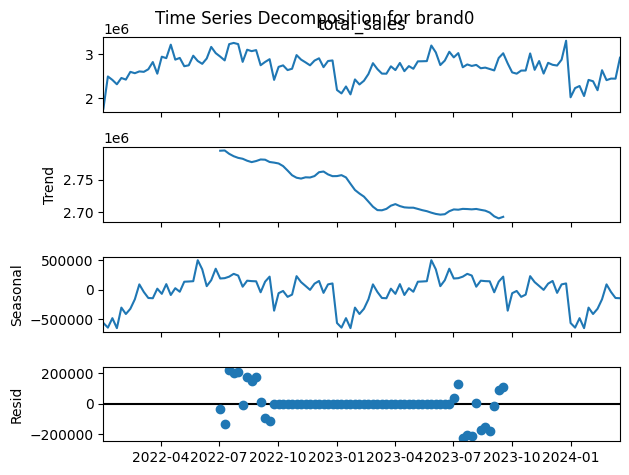

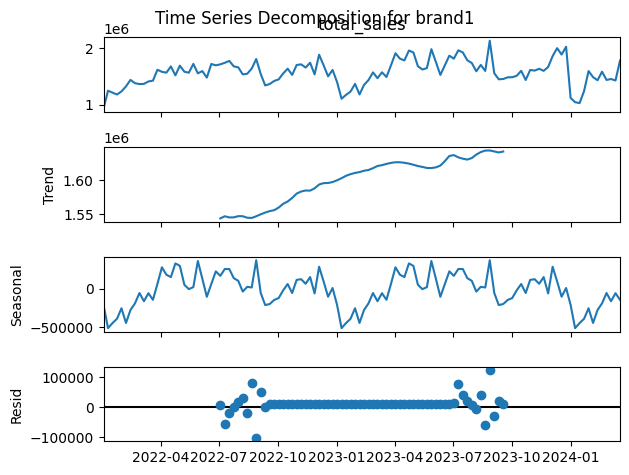

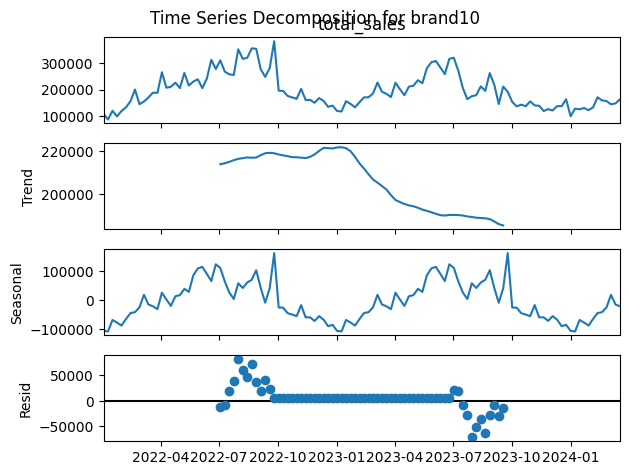

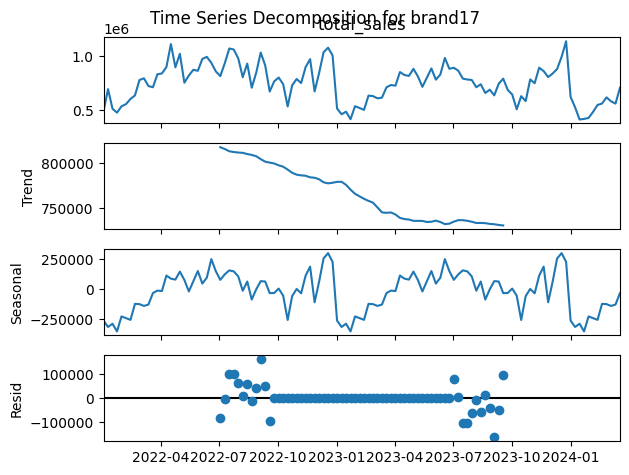

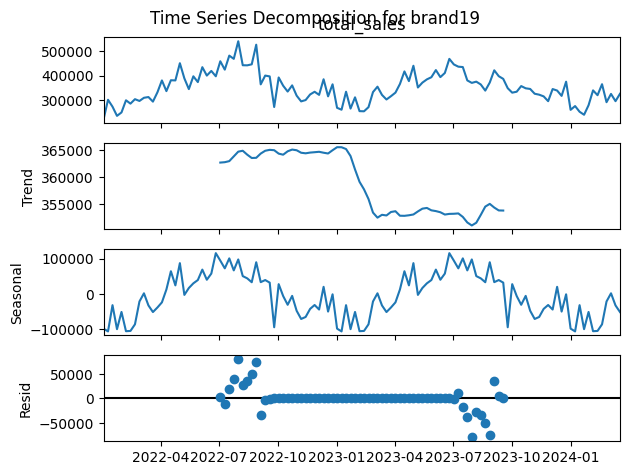

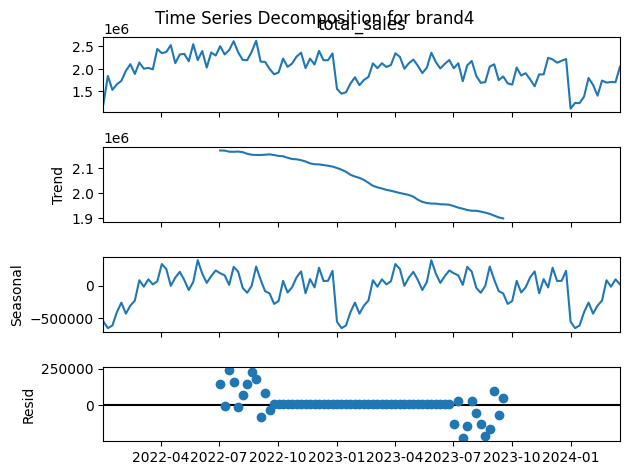

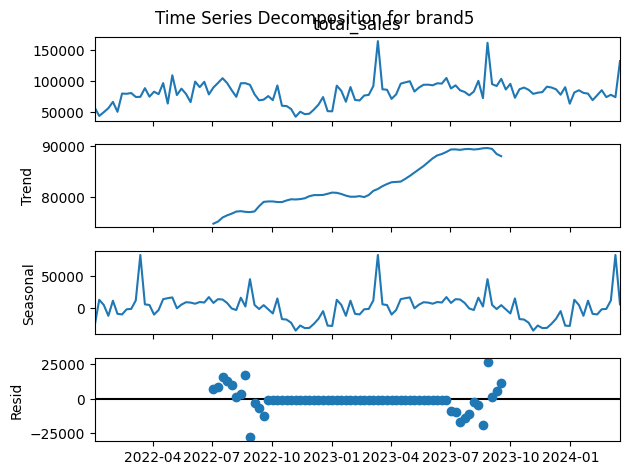

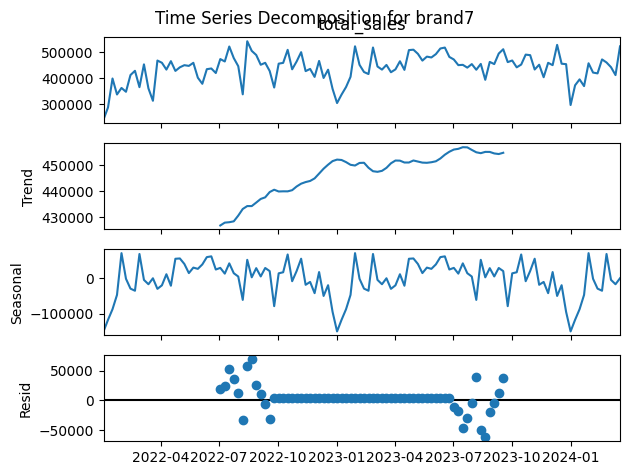

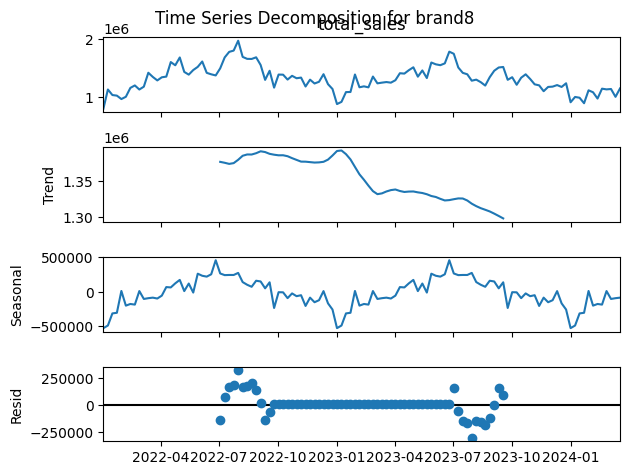

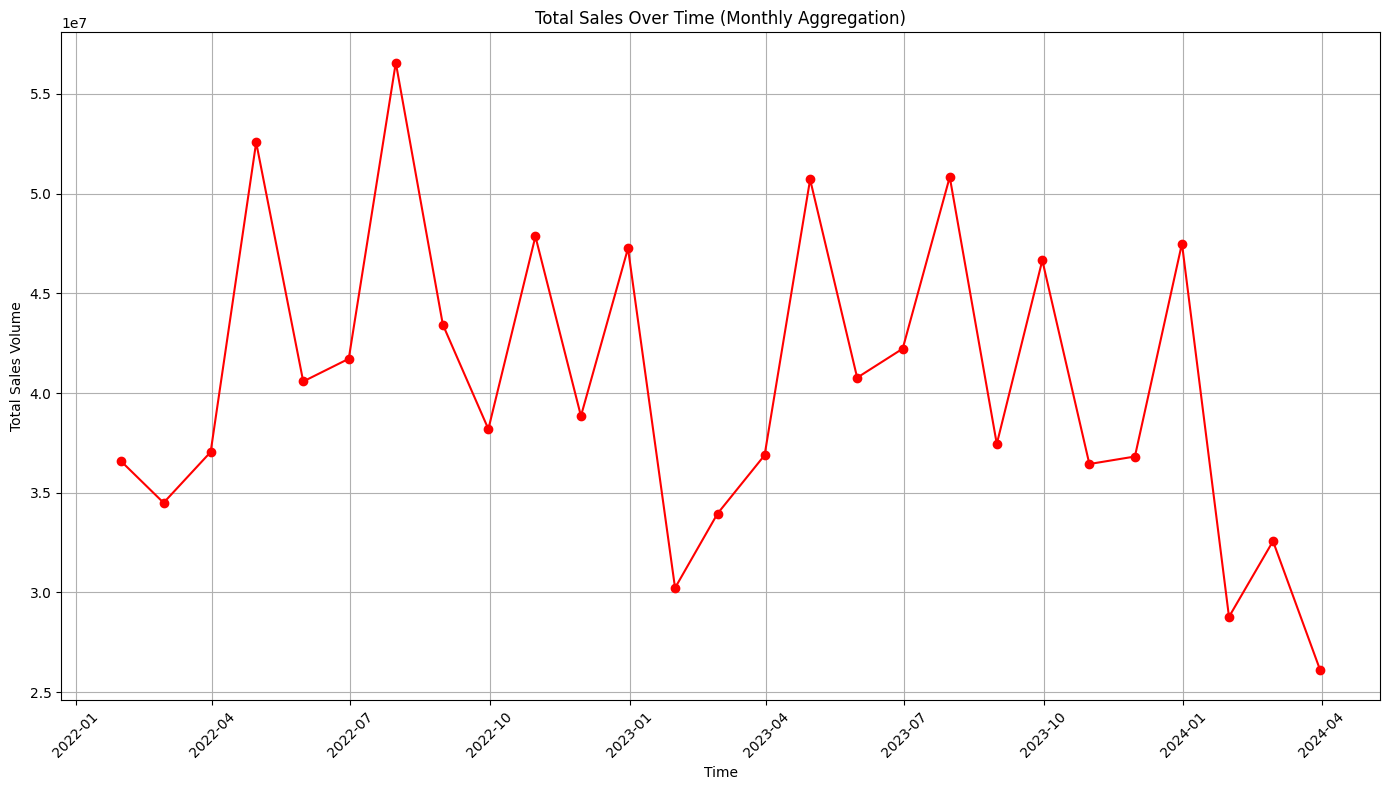

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the file
file_path = 'contributions v5.csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime, considering day first in the format
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Sum all the drivers to create a total sales figure for each customer, brand, and date
time_column = 'date'  # or 'year', depending on your data
numeric_data = data.select_dtypes(include=[float, int])

# Group by customer, brand, and time, then sum the numeric columns to get total sales
grouped_data = numeric_data.groupby([data['customer_name'], data['brand'], data[time_column]]).sum()

# Sum across all the drivers to get total sales
grouped_data['total_sales'] = grouped_data.sum(axis=1)

# Step 1: Plot Sales by Brand Over Time
# Group by brand and date, then sum the total sales
sales_by_brand = grouped_data['total_sales'].groupby([grouped_data.index.get_level_values('brand'),
                                                     grouped_data.index.get_level_values('date')]).sum()

# Get the unique brands
brands = sales_by_brand.index.get_level_values('brand').unique()

# Plot sales over time for each brand
plt.figure(figsize=(16, 12))

for brand in brands:
    brand_sales = sales_by_brand[brand]
    plt.plot(brand_sales.index, brand_sales.values, marker='o', linestyle='-', label=brand)

plt.title('Total Sales Over Time by Brand')
plt.xlabel('Time')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Examine Weekly Patterns
# Resample the data to weekly frequency
weekly_sales = grouped_data['total_sales'].groupby(level=2).sum().resample('W').sum()

plt.figure(figsize=(14, 8))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='green')
plt.title('Total Sales Over Time (Weekly Aggregation)')
plt.xlabel('Time')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: ACF and PACF by Brand
for brand in brands:
    brand_sales = sales_by_brand[brand].resample('W').sum()  # Resample to weekly data if not already
    
    # Plot ACF
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    sm.graphics.tsa.plot_acf(brand_sales, lags=40, ax=axes[0])
    axes[0].set_title(f'ACF for {brand}')
    
    # Plot PACF
    sm.graphics.tsa.plot_pacf(brand_sales, lags=40, ax=axes[1])
    axes[1].set_title(f'PACF for {brand}')
    
    plt.tight_layout()
    plt.show()

# Step 4: Decomposition of Time Series
for brand in brands:
    brand_sales = sales_by_brand[brand].resample('W').sum()  # Resample to weekly data if not already
    decomposition = sm.tsa.seasonal_decompose(brand_sales, model='additive')
    fig = decomposition.plot()
    fig.suptitle(f'Time Series Decomposition for {brand}')
    plt.show()

# Step 5: Check Monthly Aggregation to Ensure Seasonality is Stripped Out
monthly_sales = grouped_data['total_sales'].groupby(level=2).sum().resample('M').sum()

plt.figure(figsize=(14, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='red')
plt.title('Total Sales Over Time (Monthly Aggregation)')
plt.xlabel('Time')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
